In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import seaborn as sns



In [2]:
fire_data = pd.read_csv("Fire.csv")
fire_data.head()

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL SAVED,PERCENTAGE LOSS,SPRINKLER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng,TOTAL LOSS,Dist to 1st Station (mi),Dist to 2nd Station (mi)
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783,5000.0,1.01,1.23
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108,10000.0,0.97,1.26
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020,20000.0,1.88,2.06
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435,12000.0,0.28,1.43
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816,55000.0,0.46,2.37


Text(0.5, 1.0, 'Correlation Heatmap')

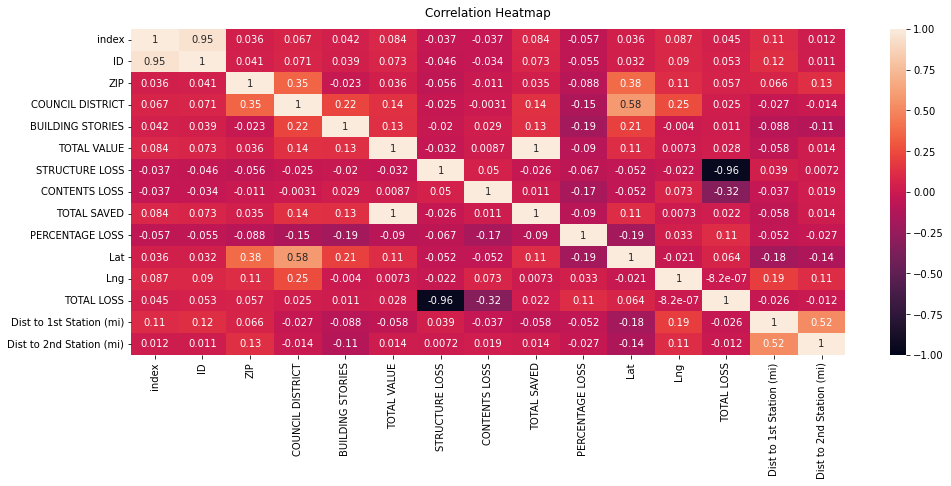

In [3]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(fire_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [4]:
fire_data.describe()

,index,ID,ZIP,COUNCIL DISTRICT,BUILDING STORIES,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,Lat,Lng,TOTAL LOSS,Dist to 1st Station (mi),Dist to 2nd Station (mi)
count,621.000000,620.000000,618.000000,594.000000,621.000000,6.210000e+02,6.210000e+02,6.210000e+02,6.210000e+02,621.000000,621.000000,621.000000,6.210000e+02,621.000000,621.000000
mean,310.000000,17878.674194,75225.291262,7.156566,1.749597,6.830368e+06,-3.205506e+04,-8.647665e+03,6.789665e+06,11.013011,32.798053,-96.783068,4.070273e+04,0.918293,1.791771
std,179.411538,394.536669,20.112309,3.673073,1.612108,4.231329e+07,2.240636e+05,6.566641e+04,4.230744e+07,18.784545,0.089979,0.072806,2.366184e+05,0.526881,0.850537
min,0.000000,16308.000000,75019.000000,1.000000,1.000000,5.000000e+02,-5.000000e+06,-1.500000e+06,2.000000e+02,0.000000,32.636369,-96.987656,0.000000e+00,0.050000,0.560000
25%,155.000000,17475.750000,75214.250000,4.000000,1.000000,9.628000e+04,-2.000000e+04,-2.500000e+03,7.800000e+04,0.080000,32.726157,-96.836984,1.000000e+03,0.520000,1.240000
50%,310.000000,17964.500000,75223.000000,7.000000,1.000000,2.500000e+05,-4.000000e+03,-7.500000e+01,2.189750e+05,1.110000,32.782945,-96.785033,5.000000e+03,0.840000,1.590000
75%,465.000000,18232.250000,75237.000000,10.000000,2.000000,3.218860e+06,-5.000000e+02,0.000000e+00,3.084300e+06,12.110000,32.867143,-96.740262,2.500000e+04,1.180000,2.080000
max,620.000000,18514.000000,75287.000000,14.000000,26.000000,7.265000e+08,0.000000e+00,0.000000e+00,7.264997e+08,94.580000,33.011212,-96.567056,5.000000e+06,3.890000,6.850000


In [5]:
fire_census = pd.read_csv("data/fire_census.csv")
fire_census.head()

,Lat,Lng,TOTAL LOSS,PERCENTAGE LOSS,Latitude,Longitude,Accuracy Score,Accuracy Type,Number,Street,...,Census Block Group,Full FIPS (block),Full FIPS (tract),Metro/Micro Statistical Area Name,Metro/Micro Statistical Area Code,Metro/Micro Statistical Area Type,Combined Statistical Area Name,Combined Statistical Area Code,Metropolitan Division Area Name,Metropolitan Division Area Code
0,32.732107,-96.814783,5000,3.01,32.732076,-96.814820,1.0,rooftop,1325.0,S Marsalis Ave,...,2,481130054002017,48113005400,"Dallas-Fort Worth-Arlington, TX",19100,metropolitan,"Dallas-Fort Worth, TX-OK",206,"Dallas-Plano-Irving, TX",19124
1,32.894248,-96.857108,10000,1.87,32.894224,-96.857101,1.0,rooftop,10728.0,Lathrop Dr,...,2,481130097022004,48113009702,"Dallas-Fort Worth-Arlington, TX",19100,metropolitan,"Dallas-Fort Worth, TX-OK",206,"Dallas-Plano-Irving, TX",19124
2,32.694543,-96.824020,20000,6.54,32.694372,-96.824152,1.0,rooftop,4155.0,S R L Thornton Fwy,...,2,481130060022003,48113006002,"Dallas-Fort Worth-Arlington, TX",19100,metropolitan,"Dallas-Fort Worth, TX-OK",206,"Dallas-Plano-Irving, TX",19124
3,32.913584,-96.764435,12000,9.47,32.913567,-96.764370,1.0,rooftop,12044.0,Willowdell Dr,...,2,481130078292005,48113007829,"Dallas-Fort Worth-Arlington, TX",19100,metropolitan,"Dallas-Fort Worth, TX-OK",206,"Dallas-Plano-Irving, TX",19124
4,32.769986,-96.908816,55000,65.48,32.769974,-96.908690,1.0,rooftop,2212.0,Lapsley St,...,2,481130106022024,48113010602,"Dallas-Fort Worth-Arlington, TX",19100,metropolitan,"Dallas-Fort Worth, TX-OK",206,"Dallas-Plano-Irving, TX",19124


C:\Users\Rob\AppData\Local\Temp/ipykernel_27876/2848017057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_census_avg['TOTAL LOSS']=  fire_census['TOTAL LOSS']
C:\Users\Rob\AppData\Local\Temp/ipykernel_27876/2848017057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_census_avg['PERCENTAGE LOSS']= fire_census['PERCENTAGE LOSS']


Text(0.5, 1.0, 'Correlation Heatmap')

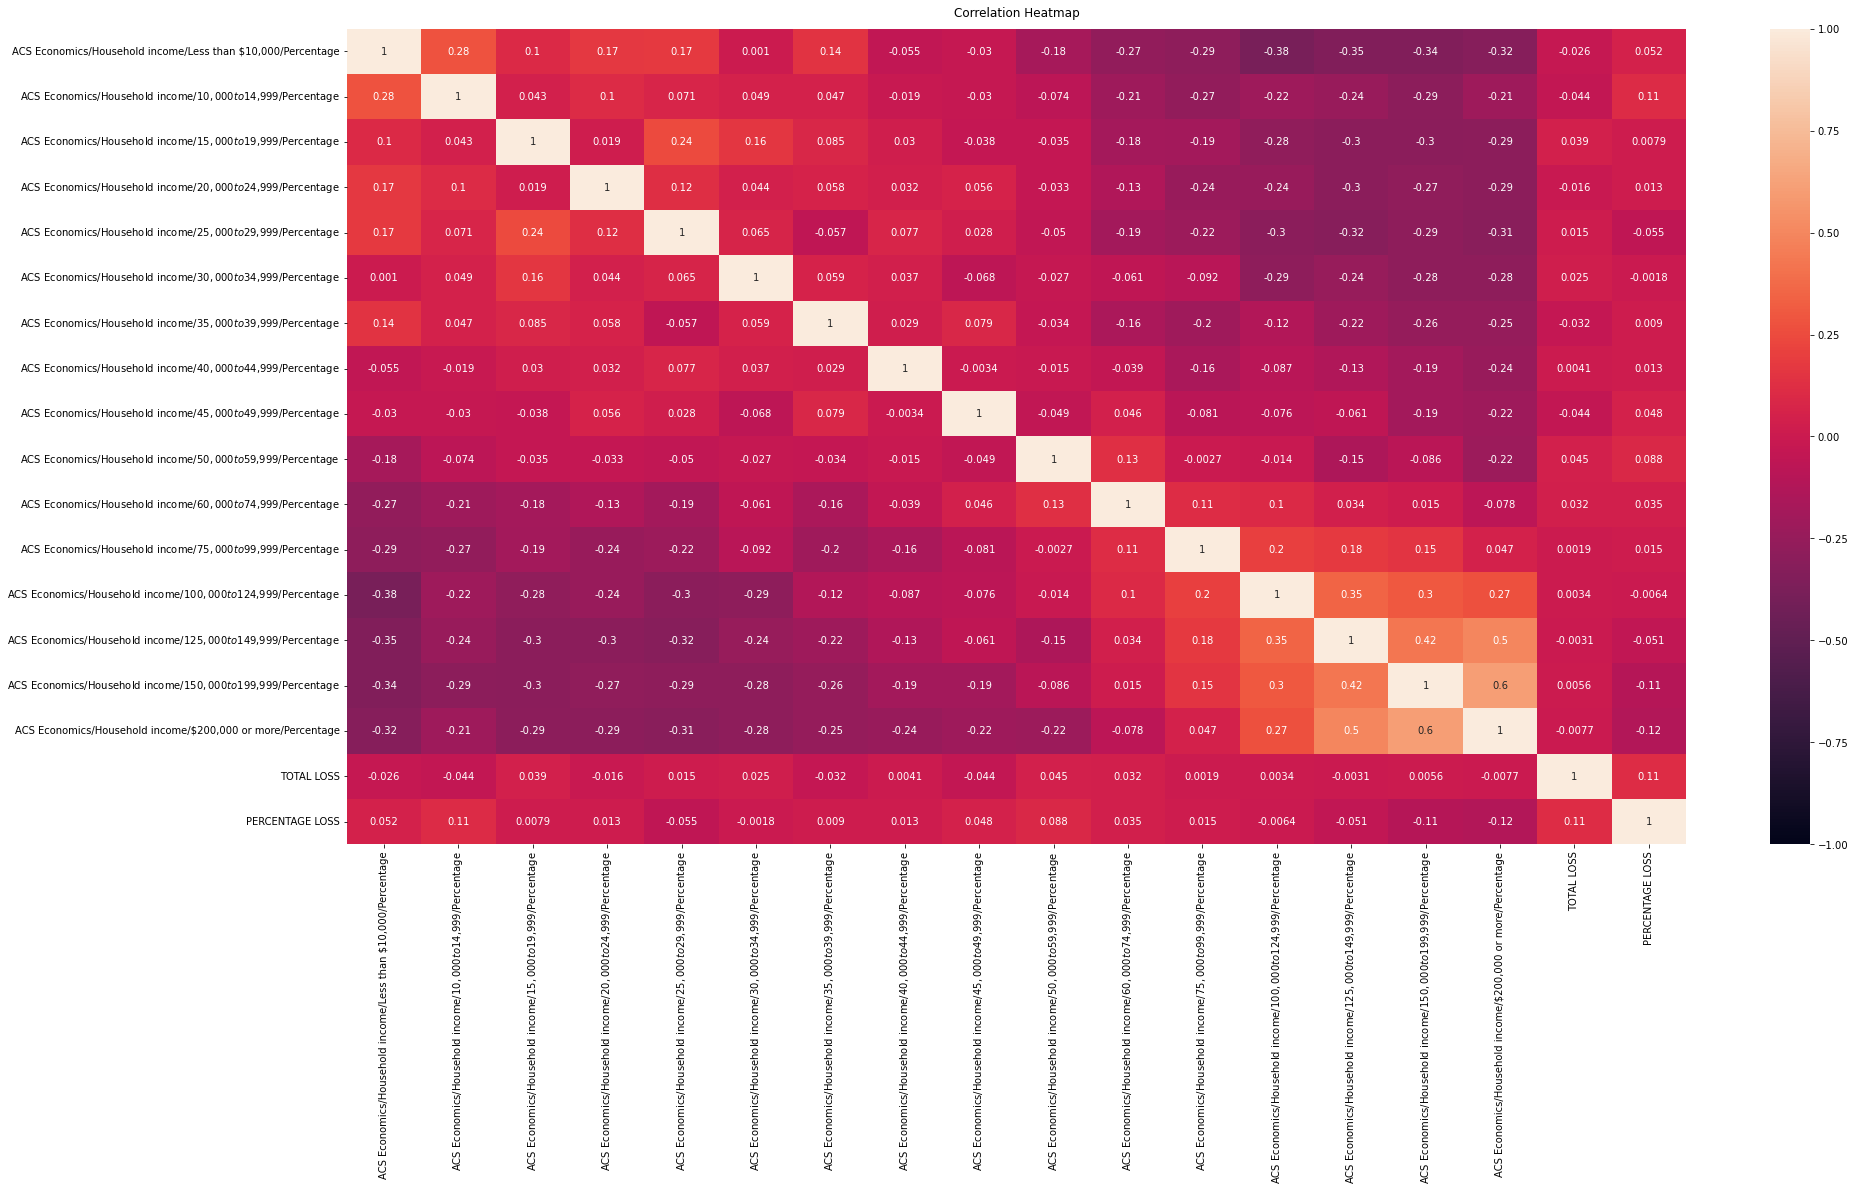

In [12]:
fire_census_avg = fire_census.filter(like="Percentage")
fire_census_avg['TOTAL LOSS']=  fire_census['TOTAL LOSS']
fire_census_avg['PERCENTAGE LOSS']= fire_census['PERCENTAGE LOSS']

plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(fire_census_avg.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)